<a href="https://colab.research.google.com/github/hopedom/DS5/blob/main/MainQuest04_%EC%9D%B4%ED%99%98%EC%B2%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. 데이터 및 라이브러리 불러오기

In [1]:
!pip install kagglehub

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df_origin = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')

df = df_origin.copy()
df.shape

Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [7]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


---
# 1.모집단과 표본 집단의 TotalPrice를 비교해 주세요.
```
* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.
```

## 데이터셋에서 무작위로 1000개의 표본을 추출하세요.

In [8]:
sample = df.sample(n = 1000, random_state = 20250821)

## 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요


In [9]:
# 표본과 전체 데이터셋의 'TotalPrice'에 대한 평균과 표준편차
p_mean = np.mean(df.TotalPrice)
p_std = np.std(df.TotalPrice)

s_mean = np.mean(sample.TotalPrice)
s_std = np.std(sample.TotalPrice)

print('--- TotalPrice의 평균과 표준편차 비교 ---')
print(f'전체 데이터셋의 평균: {p_mean:.2f}')
print(f'추출된 표본의 평균: {s_mean:.2f}')

print(f'\n전체 데이터셋의 표준편차: {p_std:.2f}')
print(f'추출된 표본의 표준편차: {s_std:.2f}')

--- TotalPrice의 평균과 표준편차 비교 ---
전체 데이터셋의 평균: 17.99
추출된 표본의 평균: 17.37

전체 데이터셋의 표준편차: 378.81
추출된 표본의 표준편차: 46.96


In [10]:
print(f'\n전체 데이터셋의 중간값: {np.median(df.TotalPrice)}')
print(f'추출된 표본의 중간값: {np.median(sample.TotalPrice):.2f}')


전체 데이터셋의 중간값: 9.75
추출된 표본의 중간값: 9.17


**평균**
- 전체 데이터셋과 표본의 평균의 차이가 거의 없음  
- 하지만 중간값에 비해 평균이 비교적 높은 것으로 보아 오른쪽으로 치우쳐진 분포임을 혜상할 수 있음  

**표준편차**
- 표본의 표준편차도 낮지 않지만 전체 데이터셋의 표준편차가 평균의 20배 수준으로 꽤 높은 편임  
- 전체 데이터셋에 포함된 이상치의 영향으로 추정됨  

Text(0.5, 0, '')

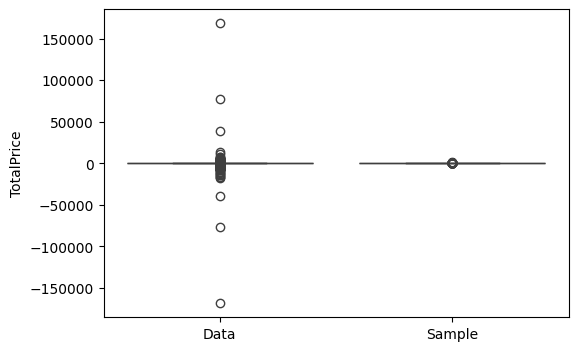

In [11]:
# 'TotalPrice'에 대한 boxplot
temp = pd.DataFrame({
    'TotalPrice': pd.concat([df.TotalPrice, sample.TotalPrice]),
    'group': ['Data'] * len(df.TotalPrice) + ['Sample'] * len(sample.TotalPrice)
})

plt.figure(figsize=(6, 4))
sns.boxplot(x = 'group', y = 'TotalPrice', data = temp)
plt.xlabel('')

표본 평균과 분산에 대한 one-sample t-test, levene test을 통해 추가 비교를 하였음

In [12]:
# 전체 데이터셋과 표본의 평균에 대한 가설검정
from scipy import stats
from IPython.display import display, Latex

t_stat, p_val = stats.ttest_1samp(sample.TotalPrice, popmean=df.TotalPrice.mean())

alpha = 0.05

print(f"--- 표본의 평균에 대한 one sample t-test (유의수준: {alpha})---")
display(Latex(r'$H_o: \mu_s = \mu_0$'))
display(Latex(r'$H_1: \mu_s \neq \mu_0$'))

print("\n--- 가섬검정 결과 ---")
print(f"t-통계량 : {t_stat:.4f}")
print(f"p-값 : {p_val:.4f}\n")

if p_val < alpha:
    print(f">> 결론: 귀무가설을 기각합니다. 전체 데이터셋과 표본의 평균은 통계적으로 유의미하게 차이가 있다.")
else:
    print(">> 결론: 귀무가설을 기각할 수 없습니다. 전체 데이터셋과 표본의 평균이 같다.")

--- 표본의 평균에 대한 one sample t-test (유의수준: 0.05)---


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


--- 가섬검정 결과 ---
t-통계량 : -0.4133
p-값 : 0.6795

>> 결론: 귀무가설을 기각할 수 없습니다. 전체 데이터셋과 표본의 평균이 같다.


In [13]:
# 전체 데이터셋과 표본의 분산에 대한 가설검정
levene_stat, levene_p_val = stats.levene(sample.TotalPrice, df.TotalPrice)

print(f"--- 두 그룹의 분산에 대한 levene test (유의수준: {alpha})---")
display(Latex(r'$H_o: \sigma_a^2 = \sigma_b^2$'))
display(Latex(r'$H_1: \sigma_a^2 \neq \sigma_b^2$'))

print("\n--- 가설검정 결과 ---")
print(f"Levene 통계량 : {levene_stat:.4f}")
print(f"p-값 : {levene_p_val:.4f}\n")

if levene_p_val < alpha:
    print(f">> 결론: 귀무가설을 기각합니다. 전체 데이터셋과 표본의 분산은 통계적으로 유의미하게 차이가 있다.")
else:
    print(">> 결론: 귀무가설을 기각할 수 없습니다. 전체 데이터셋과 표본의 분산은 같다.")

--- 두 그룹의 분산에 대한 levene test (유의수준: 0.05)---


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


--- 가설검정 결과 ---
Levene 통계량 : 0.0821
p-값 : 0.7745

>> 결론: 귀무가설을 기각할 수 없습니다. 전체 데이터셋과 표본의 분산은 같다.


**결과 분석**  
- 가설 검정을 통해 전체 데이터셋과 표본의 평균과 분산이 통계적으로 같음을 확인하였음.  
- levene test는 예상을 뒤엎을정도로 이상치에 강건한 검정임을 확인하였음

## 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

**분석방향**  
$$ \bar{ X } \sim N(\mu, \,\, \sigma^2/n) $$  
- 중심극한정리는 모집단으로부터 추출된 표본의 크기가 충분히 크면 표본평균 분포는 모집단의 분포와 상관없이 평균이 모집단의 평균와 같고, 분산은 모집단의 분산/샘플 수인 정규분포를 근사한다는 정리이다.  
- 이ㅜ 성질을 코드를 통해 확인해보고자 함


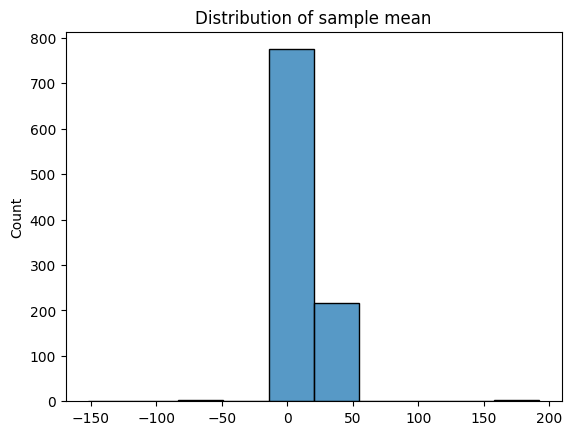

In [14]:
# 표본 평균의 분포, 평균 그리고 분산을 확인하기 위해 1000개의 샘플로 구성된 표본을 1000번 만든 후 표본 평균값에 대한 리스트를 생성하였음
sample_mean_list = []

for i in range(1000):
  sample = df.TotalPrice.sample(n = 1000)
  sample_mean_list.append(sample.mean())

sns.histplot(sample_mean_list, bins=10)
plt.title("Distribution of sample mean")
plt.show()

In [15]:
print('--- TotalPrice의 평균과 표준편차 비교 ---')
print(f'전체 데이터셋의 평균: {p_mean:.2f}')
print(f'전체 데이터셋의 분산: {p_std:.2f}')

print(f"\n표본평균 평균: {np.mean(sample_mean_list):.2f}")
print(f"표본평균 분산: {np.var(sample_mean_list):.2f}")

--- TotalPrice의 평균과 표준편차 비교 ---
전체 데이터셋의 평균: 17.99
전체 데이터셋의 분산: 378.81

표본평균 평균: 18.24
표본평균 분산: 151.90


In [16]:
# 정규성 확인을 위한 shapiro test
from scipy.stats import shapiro

print(f"--- 정규성 확인을 위한 shapiro test (유의수준: {alpha})---")
print('H0: 데이터는 정규분포를 따른다')
print('H1: 데이터는 정규분포를 따르지 않는다')

print("\n --- 정규성 검정 결과 (shapiro) ---")
shapiro_pval = shapiro(sample_mean_list)[1]
print(f"p-값: {shapiro_pval:.4f}\n")

if shapiro_pval < alpha:
    print(f">> 결론: 귀무가설을 기각합니다. 데이터는 정규성을 충족하지 않습니다.")
else:
    print(">> 결론: 귀무가설을 기각할 수 없습니다.")

--- 정규성 확인을 위한 shapiro test (유의수준: 0.05)---
H0: 데이터는 정규분포를 따른다
H1: 데이터는 정규분포를 따르지 않는다

 --- 정규성 검정 결과 (shapiro) ---
p-값: 0.0000

>> 결론: 귀무가설을 기각합니다. 데이터는 정규성을 충족하지 않습니다.


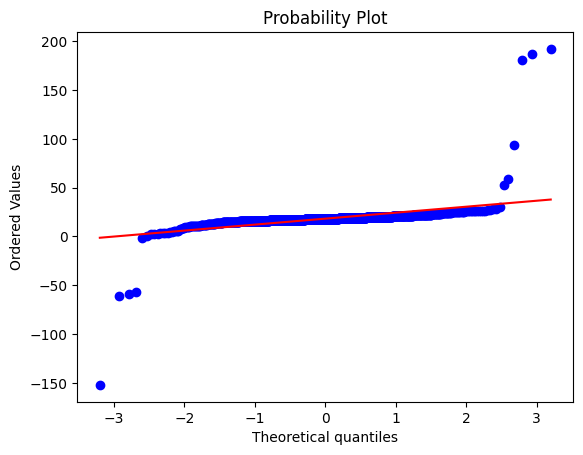

In [17]:
# 정규성 확인을 위한 Q-Q plot
stats.probplot(sample_mean_list, dist="norm", plot=plt)
plt.show()

**결과분석**  
- 표본 평균의 분포는 중심극한정리에 의해 정규분포에 근사하지만 shapiro test에서는 정규성을 충족하지 않는것으로 확인되었음  
- 추가로, Q-Q plot에서도 양 끝 부분에 있는 이상치의 영향이 식별되었음  

- 이상치에 대한 전처리 수행 후 정규성 검정을 수행한다면 정규성을 충족될 것이라 기대됨

---
# 2.주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.
```
* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.
```

## 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.

In [18]:
df[df['TotalPrice']  > 0].groupby('Country')['InvoiceNo'].describe()['count'].sort_values(ascending=False)[:10]

,count
Country,
United Kingdom,485123
Germany,9040
France,8407
EIRE,7890
Spain,2484
Netherlands,2359
Belgium,2031
Switzerland,1966
Portugal,1501


\>> 주문이 가장 많은 상위 두 국가는 `United Kingdom` 그리고 `Germany`

## 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.

In [19]:
group_a = df.loc[(df.TotalPrice > 0) & (df.Country =='United Kingdom'), 'TotalPrice']
group_b = df.loc[(df.TotalPrice > 0) & (df.Country =='Germany'), 'TotalPrice']

t_stat_lib, p_val_lib = stats.ttest_ind(group_a, group_b, equal_var=False)

print(f"--- 영국와 독일의 TotalPrice 평균차이에 대한 t- test (유의수준: {alpha})---")
display(Latex(r'$H_o: \mu_u = \mu_g$'))
display(Latex(r'$H_1: \mu_u \neq \mu_g$'))

print("\n--- 가설 검정 결과 ---")
print(f"t-통계량 : {t_stat_lib:.4f}")
print(f"p-값 : {p_val_lib:.4f}\n")

if p_val_lib < alpha:
    print(f">> 결론: 귀무가설을 기각합니다. 영국과 독일의 TotaiPrice 평균은 같지 않습니다.")
else:
    print(">> 결론: 귀무가설을 기각할 수 없습니다.")

--- 영국와 독일의 TotalPrice 평균차이에 대한 t- test (유의수준: 0.05)---


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


--- 가설 검정 결과 ---
t-통계량 : -12.2117
p-값 : 0.0000

>> 결론: 귀무가설을 기각합니다. 영국과 독일의 TotaiPrice 평균은 같지 않습니다.


## t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

**[답변]**  

1. t 검정 결과 해석  
- `t-통계량(-12.2117)으로 산출한 p-값(0.0000) < 유의수준(0.05)`이므로 `귀무가설을 기각`한다고 결과를 해석할 수 있음     
- 위 결론은 두 국가(영국과 독일)의 'TotalPrice' 평균에는 통계적으로 유의미한 차이가 있다는 의미를 가짐  
2. 1종 오류($\alpha$)
- $P(\alpha)$ = $P(reject \, H_o | H_o \, is \, True)$  
- 두 국가의 'TotalPrice' 평균이 실제로 차이가 없는데 차이가 있다고 잘못 결론 내릴 확률을 의미함  
3. 2종 오류($\beta$)    
- $P(\beta)$ = $P(accept \, H_o | H_1 \, is \, True)$  
- 두 국가의 'TotalPrice' 평균이 실제로 차이가 있는데 차이가 없다고 잘못 결론 내릴 확률을 의미함  

---
# 3.주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.
```
* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.
```

## 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.

In [20]:
help(pd.Series.dt.dayofweek)

Help on property:

    The day of the week with Monday=0, Sunday=6.

    Return the day of the week. It is assumed the week starts on
    Monday, which is denoted by 0 and ends on Sunday which is denoted
    by 6. This method is available on both Series with datetime
    values (using the `dt` accessor) or DatetimeIndex.

    Returns
    -------
    Series or Index
        Containing integers indicating the day number.

    See Also
    --------
    Series.dt.dayofweek : Alias.
    Series.dt.weekday : Alias.
    Series.dt.day_name : Returns the name of the day of the week.

    Examples
    --------
    >>> s = pd.date_range('2016-12-31', '2017-01-08', freq='D').to_series()
    >>> s.dt.dayofweek
    2016-12-31    5
    2017-01-01    6
    2017-01-02    0
    2017-01-03    1
    2017-01-04    2
    2017-01-05    3
    2017-01-06    4
    2017-01-07    5
    2017-01-08    6
    Freq: D, dtype: int32



- 위 메서드의 descrption에 따르면, dayofweek 메서드는 입력된 dt값에 해당하는 요일에 대해 `월요일`을 `0`으로 시작하여 `일요일`을 `6`으로 변환함  
- 주말을 토요일과 일요일로 정의한다면, `평일은 DayOfWeeak 값이 5미만`이며, `주말은 5이상`으로 필터링할 수 있음  

In [21]:
# is_weekend 생성 : 주말에 해당하면 True, 평일에 해당하면 False 값을 가짐
df['is_weekend'] = (df['DayOfWeek'] >=5)

# 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.
weekend = df.loc[df['is_weekend'], 'UnitPrice']
weekday = df.loc[~df['is_weekend'], 'UnitPrice']

pd.DataFrame({
    '평균' : [np.mean(weekend), np.mean(weekday)],
    '중간값' : [np.median(weekend), np.median(weekday)],
    '표준편차' : [np.std(weekend), np.std(weekday)],
    '분산' : [np.var(weekend), np.var(weekday)],
    '최소값' : [weekend.min(), weekday.min()],
    '분위수(25%)' : [weekend.quantile(0.25), weekday.quantile(0.25)],
    '분위수(50%)' : [weekend.quantile(0.50), weekday.quantile(0.50)],
    '분위수(75%)' : [weekend.quantile(0.75), weekday.quantile(0.75)],
    '최대값' : [weekend.max(), weekday.max()]
    }, index = ['평일', '주말']
)

,평균,중간값,표준편차,분산,최소값,분위수(25%),분위수(50%),분위수(75%),최대값
평일,2.887824,1.85,7.959436,63.352615,0.00,1.25,1.85,3.75,1236.75
주말,4.843425,2.10,103.031950,10615.582697,-11062.06,1.25,2.10,4.13,38970.00


---
# 4.상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
```
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.
```

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,is_weekend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,False


## 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  

In [23]:
# 원본 데이터의 상태를 유지하기 위해 미리 종복변수와 독립변수를 나눈 후 전처리 및 데이터 탐색을 수행하였음
X = df[['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']]
y = df['Quantity']

### 결측치 처리

In [24]:
print("'X.info' 출력 :")
X.info()
print("\n'y.info' 출력 : ")
y.info()

'X.info' 출력 :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   UnitPrice     541909 non-null  float64
 1   Country       541909 non-null  object 
 2   DayOfWeek     541909 non-null  int32  
 3   InvoiceMonth  541909 non-null  int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 12.4+ MB

'y.info' 출력 : 
<class 'pandas.core.series.Series'>
RangeIndex: 541909 entries, 0 to 541908
Series name: Quantity
Non-Null Count   Dtype
--------------   -----
541909 non-null  int64
dtypes: int64(1)
memory usage: 4.1 MB


- 종속변수와 독립변수에 대해 명시적인 결측이 없음을 확인함  

### 이상치 처리

#### UnitPrice

<Axes: ylabel='Frequency'>

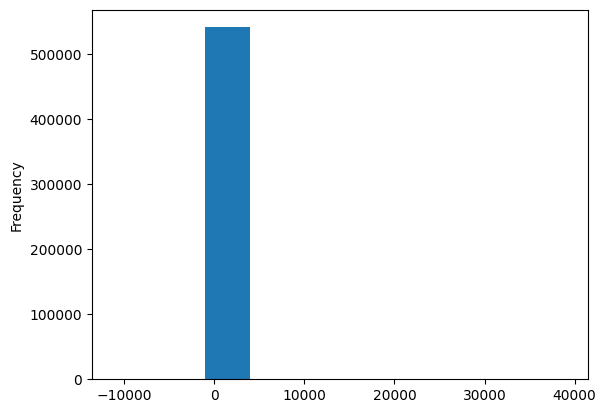

In [25]:
X.UnitPrice.plot(kind='hist', bins=10)

In [26]:
X.UnitPrice.describe()

,UnitPrice
count,541909.000000
mean,4.611114
std,96.759853
min,-11062.060000
25%,1.250000
50%,2.080000
75%,4.130000
max,38970.000000


**결과 분석**  
- UnitPrice가 0 이하의 값을 가지는 이상치가 존재  
- UnitPrice가 높은 값들이 존재
\>> **IQR을 활용해 이상치 처리 진행**  

In [27]:
# IQR을 활용한 이상치 처리 진행
def prep_for_outliers_by_IQR(X, feat):
  q1 = X[feat].quantile(0.25)
  q3 = X[feat].quantile(0.75)
  IQR = q3 - q1

  lb = q1 - 1.5 * IQR
  ub = q3 + 1.5 * IQR

  X = X[(X[feat] >= lb) & (X[feat] <= ub)]

  return X

Text(0.5, 1.0, 'Dist. of UnitPrice (after Prep.)')

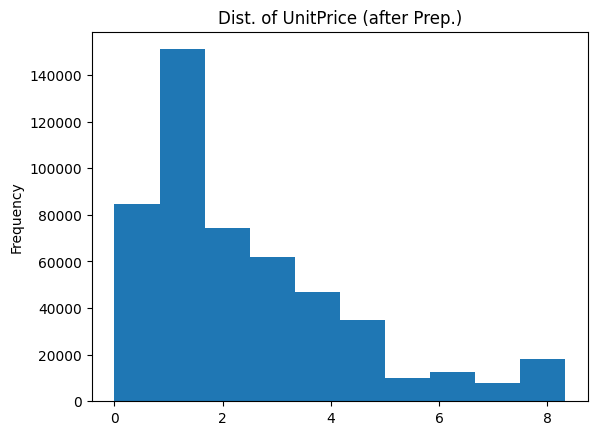

In [28]:
# 이상치 처리
X = prep_for_outliers_by_IQR(X, 'UnitPrice')

X.UnitPrice.plot(kind='hist', bins=10)
plt.title('Dist. of UnitPrice (after Prep.)')

#### Quantity

<Axes: ylabel='Frequency'>

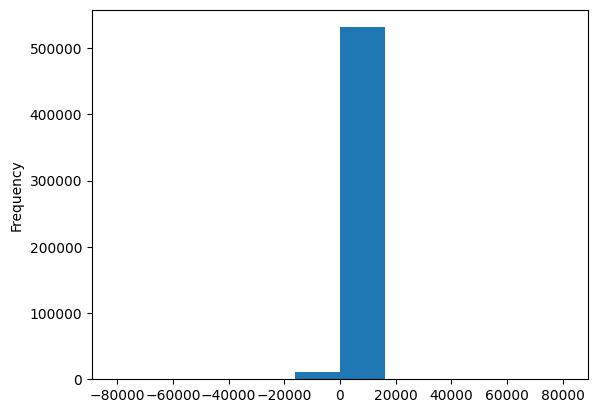

In [29]:
y.plot(kind='hist', bins=10)

Quantity도 UnitPrice와 마찬가지로 IQR을 활용해 이상치 처리 진행

<Axes: ylabel='Frequency'>

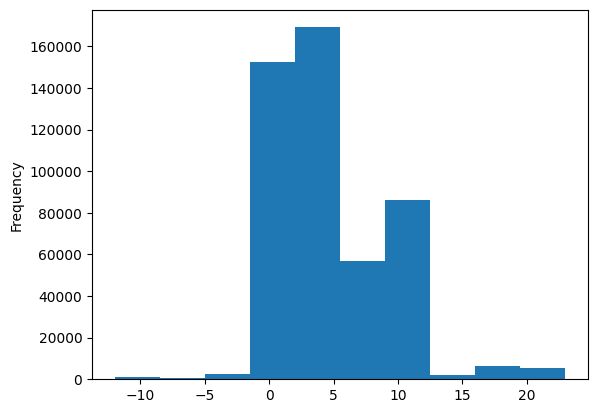

In [30]:
prep_for_outliers_by_IQR(pd.DataFrame(y), 'Quantity')['Quantity'].plot(kind = 'hist', bins=10)

- Quantity의 경우, UnitPrice와 마찬가지로 IQR을 활용한 이상치 처리 진행해도 0이하의 값이 확인됨
- LB를 max(q1 - 1.5 * IQR, 0) 으로 수정 후 이상치 처리 재수행

In [31]:
# IQR을 활용한 이상치 처리 함수
def prep_for_outliers_by_IQR(X, feat):
  q1 = X[feat].quantile(0.25)
  q3 = X[feat].quantile(0.75)
  IQR = q3 - q1

  lb = max(q1 - 1.5 * IQR, 0) # 수정
  ub = q3 + 1.5 * IQR

  X = X[(X[feat] >= lb) & (X[feat] <= ub)]

  return X

Text(0.5, 1.0, 'Dist. of Quantity (after Prep.)')

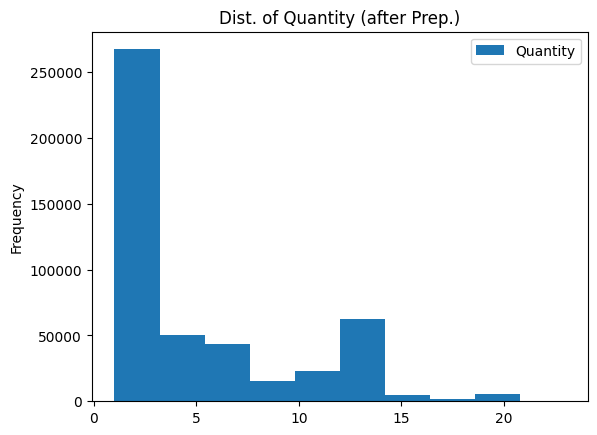

In [32]:
y = prep_for_outliers_by_IQR(pd.DataFrame(y), 'Quantity')
y.plot(kind = 'hist', bins=10)
plt.title('Dist. of Quantity (after Prep.)')

#### Country

In [33]:
# Country 가 Unspecified인 데이터는 삭제 처리
X = X[X.Country != 'Unspecified']
X = pd.get_dummies(X, columns=['Country'], drop_first=True)

In [34]:
bool_cols = X.select_dtypes(include='bool').columns # bool 타입 -> int 타입
X[bool_cols] = X[bool_cols].astype(int)

In [35]:
def prep_for_OLS(df):
  df = df[['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth', 'Quantity']]

  # UnirPrice 이상치 처리
  df = prep_for_outliers_by_IQR(df, 'UnitPrice')

  # Quantity 이상치 처리
  df = prep_for_outliers_by_IQR(df, 'Quantity')

  df = df[df.Country != 'Unspecified']  # Country 결측 처리
  df = pd.get_dummies(df, columns=['Country'], drop_first=True) # Country 가변수 처리

  bool_cols = df.select_dtypes(include='bool').columns # bool 타입 -> int 타입
  df[bool_cols] = df[bool_cols].astype(int)

  X = df.drop('Quantity', axis=1)
  y = df['Quantity']
  return X, y

In [36]:
X, y = prep_for_OLS(df)

print ('--- 전처리 결과 ---')
print('데이터 수 (before):', len(df))
print('데이터 수 (after): ', len(X), len(y))

--- 전처리 결과 ---
데이터 수 (before): 541909
데이터 수 (after):  466061 466061


## 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)

### statsmodels.OLS 활용

In [37]:
import statsmodels.api as sm

X = sm.add_constant(X) # 상수항 추가

model = sm.OLS(y, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     2266.
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        15:07:55   Log-Likelihood:            -1.4862e+06
No. Observations:              466061   AIC:                         2.973e+06
Df Residuals:                  466021   BIC:                         2.973e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### sklearn.lenear_model 활용
결과가 너무 좋지 못하여 sklearn 라이브러리를 활용하여 다시 시도

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X, y = prep_for_OLS(df)

# 데이터를 훈련(train) 세트와 테스트(test) 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LinearRegression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 1. 회귀 계수 (Coefficients)
# .coef_ 속성으로 회귀 계수들을 확인할 수 있습니다.
# .intercept_ 속성으로 y절편을 확인할 수 있습니다.
coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
print("--- 회귀 계수 ---")
print(coefficients)
print(f"\nY-절편 (Intercept): {model.intercept_:.4f}")

# 2. 결정 계수 (R-squared)
# .score() 메서드로 결정 계수를 계산하거나, sklearn.metrics.r2_score 함수를 사용할 수 있습니다.
r_squared_score = model.score(X_test, y_test)
print(f"\n--- 결정 계수 (R-squared) ---")
print(f"결정 계수: {r_squared_score:.4f}")

--- 회귀 계수 ---
                              Coefficient
UnitPrice                       -1.137762
DayOfWeek                       -0.076626
InvoiceMonth                    -0.032876
Country_Austria                 -0.741384
Country_Bahrain                 -3.425526
Country_Belgium                 -0.531139
Country_Brazil                   2.029595
Country_Canada                   0.300490
Country_Channel Islands          0.620196
Country_Cyprus                  -3.005028
Country_Czech Republic           7.926733
Country_Denmark                  3.982582
Country_EIRE                    -0.092441
Country_European Community      -0.545974
Country_Finland                  0.335848
Country_France                  -0.360185
Country_Germany                  0.058250
Country_Greece                   0.355658
Country_Hong Kong                0.901344
Country_Iceland                  0.626985
Country_Israel                   0.446218
Country_Italy                   -0.495275
Country_Japan       

- sklearn 라이브러리를 활용한 다중선형회귀 진행 결과, statsmodel 라이브러리로 진행한 다중선형회귀 결과와 비슷하게 도출되었음

## 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

- 회귀계수의 경우, 대부분의 독립 변수에 대한 회귀계수가 음수값으로 도출되었음
  - UnitPrice, DayOfWeek, InvoiceMonth 회귀계수가 두 모델에서 전부 음수
    
- 결정계수는 0.159로 이 모델은 판매 수량(Quantity)의 변동을 설명하는 데 있어 설명력이 매우 부족하다는 판단할 수 있음


---
# 5.상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
```
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.
```

## 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.

In [39]:
df = df_origin.copy()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 결측 및 이상치 처리

#### CustomerID

In [41]:
df.CustomerID.nunique()

4372

In [42]:
len(df[df.CustomerID.isna()]) / len(df) *100

24.926694334288598

결측 비율이 너무 높은 특징이라 예측에 활용하기 어렵다고 판단. 삭제 처리

In [43]:
df = df.drop('CustomerID', axis=1)

#### InvoiceNo

In [44]:
df.InvoiceNo.str.len().value_counts()

,count
InvoiceNo,
6,532618
7,9291


InvoiceNo는 대부분 길이 6을 가지나 길이가 7인 데이터를 우선 확인하였음

In [45]:
# 길이가 6을 초과하는 데이터의 첫번째 값 확인
df[df.InvoiceNo.str.len() == 7]['InvoiceNo'].str[0].value_counts()

,count
InvoiceNo,
C,9288
A,3


In [46]:
# InvoiceNo의 길이가 7이며 'A'로 시작하는 데이터
df[df['InvoiceNo'].str.startswith('A')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
299982,A563185,B,Adjust bad debt,1,8/12/11 14:50,11062.06,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/11 14:51,-11062.06,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/11 14:52,-11062.06,United Kingdom


InvoiceNo의 길이가 7이며 'A'로 시작하는 데이터의 경우,   
- 빈도수, StockCode, Descrpiption을 고려했을 때 이상치로 판단됨. **삭제 처리**

In [47]:
df = df[~df.InvoiceNo.str.startswith('A')] # InvoiceNo가 'A'로 시작하는 데이터 삭제

In [48]:
# InvoiceNo의 길이가 7이며 'C'로 시작하는 데이터
df[df.InvoiceNo.str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,United Kingdom
...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,United Kingdom


- InvoiceNo가 'C'로 시작하는 데이터는 반품 예측에 유용한 정보로 판단됨
- 다른 특징에 대한 탐색 및 전처리 후 필요 시 추가 분석

In [49]:
# Invoice의 길이가 6인 데이터
tmp = df[df.InvoiceNo.str.len() ==6]
tmp

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,France


In [50]:
tmp['InvoiceNo'].str[0].value_counts()

,count
InvoiceNo,
5,532618


In [51]:
tmp['InvoiceNo'].astype('int').describe()

,InvoiceNo
count,532618.000000
mean,559965.752027
std,13428.417281
min,536365.000000
25%,547906.000000
50%,560688.000000
75%,571841.000000
max,581587.000000


In [52]:
df['is_Invoice_contains_C'] = df['InvoiceNo'].str.startswith('C')

In [53]:
df.loc[df['InvoiceNo'].str.startswith('C'), 'InvoiceNo'] = df.loc[df['InvoiceNo'].str.startswith('C'), 'InvoiceNo'].str.replace('C', "")

In [54]:
df['InvoiceNo'].str.len().value_counts()

,count
InvoiceNo,
6,541906


In [55]:
df['InvoiceNo'] = df['InvoiceNo'].astype('int')

 InvoiceNo에 대한 결측 및 이상치 처리 결과 정리
- 길이가 6인 경우, 특이점 없음
- 길이가 7이며 'A'로 시작하는 데이터는 이상치로 판단하여 삭제 처리하였음
- 길이가 7이며 'C'로 시작하는 데이터의 경우, 정보 보존을 위해 'is_Invoice_contains_C' 생성
- 끝으로 InvoiceNo는 연속형 변수로 변경

#### Quantity

In [56]:
df['Quantity'].sort_values()

,Quantity
540422,-80995
61624,-74215
225530,-9600
225529,-9600
4287,-9360
...,...
421632,4800
74614,5568
502122,12540
61619,74215


<Axes: >

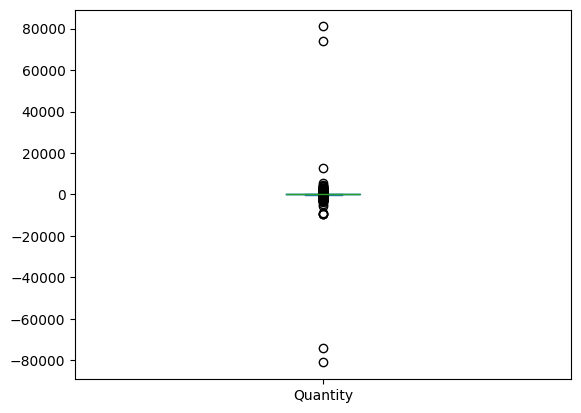

In [57]:
df['Quantity'].plot(kind='box')

Q1, Q3가 겹쳐보일정도로 0주변에 밀도있게 분포되어 있음

In [58]:
df['Quantity'].describe()

,Quantity
count,541906.000000
mean,9.552297
std,218.081761
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [59]:
df[df['Quantity'].astype('str').str.contains('80995')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,is_Invoice_contains_C
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/11 9:15,2.08,United Kingdom,False
540422,581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/11 9:27,2.08,United Kingdom,True


In [60]:
df[df['Quantity'].astype('str').str.contains('74215')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,is_Invoice_contains_C
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,United Kingdom,False
61624,541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/11 10:17,1.04,United Kingdom,True


Quantity가 음수인 데이터의 경우, 원 주문으로 보이는 데이터가 데이터셋에 존재함

Quantity_group  
활용하려는 모델이 로지스틱 회귀이기 때문에, Quantity에 대한 이상치 처리 대신 Quantity_group을 생성하였음

In [61]:
df['Quantity_group'] = pd.cut(df['Quantity'],
                              bins = [-81000, -1000, 0, 1000, 81000], right=False)

In [62]:
df['Quantity_group'].value_counts().sort_index()

,count
Quantity_group,
"[-81000, -1000)",58
"[-1000, 0)",10566
"[0, 1000)",531153
"[1000, 81000)",129


#### StockCode

In [63]:
df.StockCode.unique()

array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

In [64]:
df.StockCode.str.len().value_counts().sort_index()

,count
StockCode,
1,712
2,144
3,710
4,1276
5,487036
6,51488
7,390
8,31
9,48


StockCode의 길이를 확인한 결과, 다양한 값이 존재하는 것을 확인  

In [65]:
df.loc[df.StockCode.str.len() == 6, 'StockCode'] = df.loc[df.StockCode.str.len() == 6 ,'StockCode'].str[:5]

StockCode의 길이가 6인 데이터의 끝자리 영어를 삭제

In [67]:
# StockCode == 'S' 데이터
df[df.StockCode == 'S']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,is_Invoice_contains_C,Quantity_group
14436,537581,S,SAMPLES,-1,12/7/10 12:03,12.95,United Kingdom,True,"[-1000, 0)"
14437,537581,S,SAMPLES,-1,12/7/10 12:03,52.00,United Kingdom,True,"[-1000, 0)"
96680,544580,S,SAMPLES,-1,2/21/11 14:25,5.74,United Kingdom,True,"[-1000, 0)"
96681,544580,S,SAMPLES,-1,2/21/11 14:25,11.08,United Kingdom,True,"[-1000, 0)"
96682,544580,S,SAMPLES,-1,2/21/11 14:25,5.79,United Kingdom,True,"[-1000, 0)"
...,...,...,...,...,...,...,...,...,...
414147,572347,S,SAMPLES,-1,10/24/11 11:03,33.05,United Kingdom,True,"[-1000, 0)"
419666,572849,S,SAMPLES,1,10/26/11 12:20,33.05,United Kingdom,False,"[0, 1000)"
480961,577330,S,SAMPLES,-1,11/18/11 14:16,2.89,United Kingdom,True,"[-1000, 0)"
480962,577330,S,SAMPLES,-1,11/18/11 14:16,75.00,United Kingdom,True,"[-1000, 0)"


In [68]:
df.loc[df.StockCode == 'S', 'Description'].str.upper().value_counts()

,count
Description,
SAMPLES,63


In [69]:
df.loc[df.StockCode == 'S', 'Quantity'].value_counts()

,count
Quantity,
-1,61
1,2


In [70]:
df.loc[(df.StockCode == 'S') & (df['Quantity'] == 1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,is_Invoice_contains_C,Quantity_group
152709,549684,S,SAMPLES,1,4/11/11 13:24,30.00,United Kingdom,False,"[0, 1000)"
419666,572849,S,SAMPLES,1,10/26/11 12:20,33.05,United Kingdom,False,"[0, 1000)"


위 케이스는 빈도수도 적고 이상치 혹은 입력오류로 간주되어 정합성을 위해 삭제 처리

In [71]:
# StockCode가 S이며 Quantity가 1인 데이터는 삭제
idx = df.loc[(df.StockCode == 'S') & (df['Quantity'] == 1)].index
df = df.drop(idx)

In [72]:
# StockCode == 'D' 데이터
df[df.StockCode == 'D']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,is_Invoice_contains_C,Quantity_group
141,536379,D,Discount,-1,12/1/10 9:41,27.50,United Kingdom,True,"[-1000, 0)"
9038,537164,D,Discount,-1,12/5/10 13:21,29.29,United Kingdom,True,"[-1000, 0)"
14498,537597,D,Discount,-1,12/7/10 12:34,281.00,United Kingdom,True,"[-1000, 0)"
19392,537857,D,Discount,-1,12/8/10 16:00,267.12,United Kingdom,True,"[-1000, 0)"
31134,538897,D,Discount,-1,12/15/10 9:14,5.76,United Kingdom,True,"[-1000, 0)"
...,...,...,...,...,...,...,...,...,...
479868,577227,D,Discount,-1,11/18/11 12:06,19.82,United Kingdom,True,"[-1000, 0)"
479869,577227,D,Discount,-1,11/18/11 12:06,16.76,United Kingdom,True,"[-1000, 0)"
493613,578239,D,Discount,-1,11/23/11 12:29,26.33,Italy,True,"[-1000, 0)"
516221,579884,D,Discount,-1,11/30/11 17:34,20.53,United Kingdom,True,"[-1000, 0)"


In [73]:
df[df.StockCode == 'D']['Description'].unique()

array(['Discount'], dtype=object)

<Axes: ylabel='Frequency'>

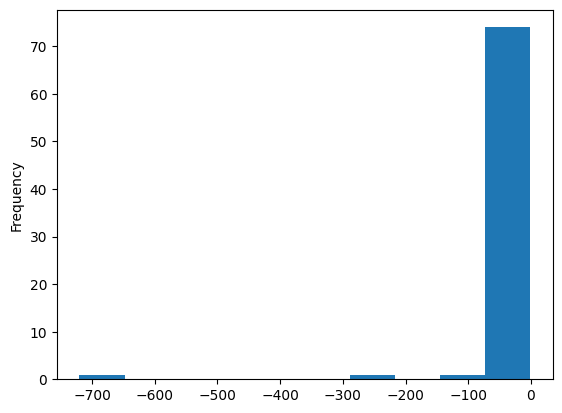

In [74]:
df[df.StockCode == 'D']['Quantity'].plot(kind='hist')

In [78]:
# StockCode == 'm' 데이터
df.loc[df.StockCode == 'm', 'StockCode']

,StockCode
40383,m


In [81]:
df.loc[df.StockCode == 'm', 'StockCode'] = 'M'

In [75]:
# StockCode == 'M' 데이터
df[df.StockCode == 'M']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,is_Invoice_contains_C,Quantity_group
2239,536569,M,Manual,1,12/1/10 15:35,1.25,United Kingdom,False,"[0, 1000)"
2250,536569,M,Manual,1,12/1/10 15:35,18.95,United Kingdom,False,"[0, 1000)"
5684,536865,M,Manual,1,12/3/10 11:28,2.55,United Kingdom,False,"[0, 1000)"
6798,536981,M,Manual,2,12/3/10 14:26,0.85,United Kingdom,False,"[0, 1000)"
7976,537077,M,Manual,12,12/5/10 11:59,0.42,United Kingdom,False,"[0, 1000)"
...,...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,12/6/11 14:23,1.25,United Kingdom,False,"[0, 1000)"
533082,581009,M,Manual,-1,12/7/11 9:15,125.00,United Kingdom,True,"[-1000, 0)"
534308,581145,M,Manual,-1,12/7/11 13:48,9.95,United Kingdom,True,"[-1000, 0)"
538321,581405,M,Manual,3,12/8/11 13:50,0.42,United Kingdom,False,"[0, 1000)"


In [76]:
df[df.StockCode == 'M']['Description'].unique()

array(['Manual'], dtype=object)

<Axes: ylabel='Frequency'>

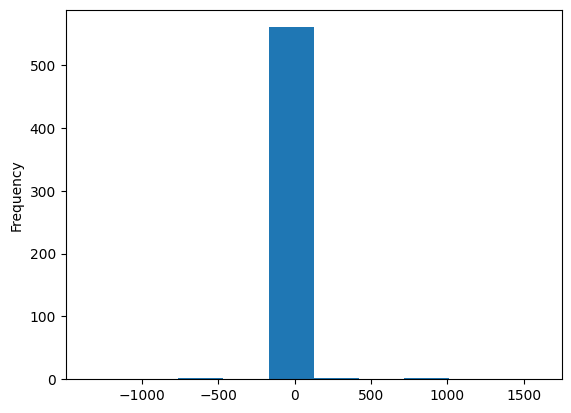

In [77]:
df[df.StockCode == 'M']['Quantity'].plot(kind='hist')

StockCode == 'M' 또는 'm'  
- StockCode를 활용하기에는 정보가 부족하다고 판단. 삭제

In [82]:
idx = df[df.StockCode == 'M'].index
df = df.drop(idx)

길이가 1인 StockCode 전처리 요약
- 'm'인 경우, 데이터가 1개 뿐이라 학습 및 예측 불가 >> 'M'으로 변경
- 'S'인 경우, Quantity가 1인 데이터는 삭제

In [89]:
df.StockCode.str.len().value_counts().sort_index()

,count
StockCode,
1,139
2,144
3,710
4,1276
5,538524
7,390
8,31
9,48
12,71


In [91]:
df['StockCode_length'] = pd.cut(df['StockCode'].str.len(), bins = [0, 1, 2, 3, 4, 5, 7, 12])

In [92]:
df = df.drop('StockCode', axis=1)

길이 값에 따라 구간화 후 'StockCode_length' 생성 후 StockCode 삭제

#### UnitPrice

In [93]:
df.UnitPrice.sort_values()

,UnitPrice
241679,0.00
222006,0.00
222036,0.00
222035,0.00
222034,0.00
...,...
15016,13541.33
15017,13541.33
43703,16453.71
43702,16888.02


<Axes: >

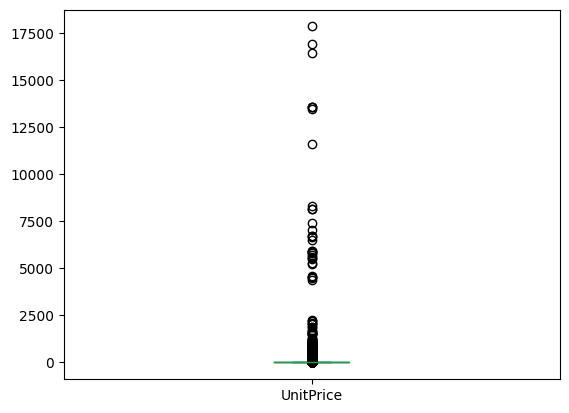

In [94]:
df.UnitPrice.plot(kind='box')

In [95]:
df[df['UnitPrice'] == 0]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,is_Invoice_contains_C,Quantity_group,StockCode_length
622,536414,NaN,56,12/1/10 11:52,0.0,United Kingdom,False,"[0, 1000)","(4, 5]"
1970,536545,NaN,1,12/1/10 14:32,0.0,United Kingdom,False,"[0, 1000)","(4, 5]"
1971,536546,NaN,1,12/1/10 14:33,0.0,United Kingdom,False,"[0, 1000)","(4, 5]"
1972,536547,NaN,1,12/1/10 14:33,0.0,United Kingdom,False,"[0, 1000)","(4, 5]"
1987,536549,NaN,1,12/1/10 14:34,0.0,United Kingdom,False,"[0, 1000)","(4, 5]"
...,...,...,...,...,...,...,...,...,...
536981,581234,NaN,27,12/8/11 10:33,0.0,United Kingdom,False,"[0, 1000)","(4, 5]"
538504,581406,POLYESTER FILLER PAD 45x45cm,240,12/8/11 13:58,0.0,United Kingdom,False,"[0, 1000)","(4, 5]"
538505,581406,POLYESTER FILLER PAD 40x40cm,300,12/8/11 13:58,0.0,United Kingdom,False,"[0, 1000)","(4, 5]"
538554,581408,NaN,20,12/8/11 14:06,0.0,United Kingdom,False,"[0, 1000)","(4, 5]"


UnitPrice가 0인 경우는 삭제 처리

In [96]:
df = df[df['UnitPrice'] != 0]

#### IsReturn

In [97]:
df['IsReturn'] = df['Quantity'] < 0

#### Country

In [105]:
df['Country'].value_counts()

,count
Country,
United Kingdom,492501
Germany,9478
France,8547
EIRE,8180
Spain,2529
Netherlands,2366
Belgium,2069
Switzerland,2001
Portugal,1505


In [108]:
top10_countries = list(df['Country'].value_counts()[:10].index)

In [110]:
condition = ~df['Country'].isin(top10_countries)

df.loc[condition, 'Country'] = 'ETC'

In [111]:
df['Country'].value_counts()

,count
Country,
United Kingdom,492501
Germany,9478
France,8547
ETC,8392
EIRE,8180
Spain,2529
Netherlands,2366
Belgium,2069
Switzerland,2001


Country의 경우, Top 10 외 나머지는 'ETC'로 변경

In [98]:
df = df.drop(['Description', 'InvoiceDate'], axis=1) # 컬럼 삭제

## 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.

In [116]:
from sklearn.model_selection import train_test_split

# 피처와 타겟 분리
X = df.drop('IsReturn', axis=1) # 전처리된 data
y = df.IsReturn

X = pd.get_dummies(X, drop_first = True)

# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [117]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

## 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [146]:
# 1. coeffients
coefficients = pd.DataFrame(lr.coef_[0], X_train.columns, columns=['Coefficient'])
print("--- 회귀 계수 ---")
print(coefficients)
print(f"\nY-절편 (Intercept): {lr.intercept_[0]:.4f}")

# 2. 결정 계수 (R-squared)
r_squared_score = lr.score(X_test, y_test)
print(f"\n--- 결정 계수 (R-squared) ---")
print(f"결정 계수: {r_squared_score:.4f}")

--- 회귀 계수 ---
                              Coefficient
InvoiceNo                       -0.000004
Quantity                        -7.975658
UnitPrice                        0.000317
is_Invoice_contains_C            0.373542
Country_Belgium                  0.000219
Country_EIRE                     0.007037
Country_ETC                      0.006658
Country_France                   0.000950
Country_Germany                  0.012715
Country_Netherlands             -0.000901
Country_Portugal                -0.000527
Country_Spain                    0.000177
Country_Switzerland              0.000064
Country_United Kingdom          -0.028996
Quantity_group_[-1000, 0)        0.373404
Quantity_group_[0, 1000)        -0.373637
Quantity_group_[1000, 81000)    -0.000031
StockCode_length_(1, 2]         -0.000077
StockCode_length_(2, 3]         -0.006331
StockCode_length_(3, 4]          0.003971
StockCode_length_(4, 5]         -0.004302
StockCode_length_(5, 7]         -0.000118
StockCode_length_(7,

결과 해석

- Quantity의 계수가 음수로, 수량이 많을수록 반품 가능성이 낮음을 시사하고 있음
- Quantity_group 변수도 반품 예측에 중요한 영향을 미침
  - Quantity_group_[-1000, 0)의 계수가 양수로, 이 그룹에 속하면 반품 가능성이 높음을 의미  
  - Quantity_group_[0, 1000)의 계수는 음수로, 이 그룹에 속하면 반품 가능성이 낮음을 의미  
- is_Invoice_contains_C의 계수가 양수로, Invoice에 'C'값의 존재 유무는 반품과 강한 관련성을 가짐을 의미

In [132]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report

y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# 혼동행렬
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,105955,0
1,0,1810


In [134]:
# 평가지표들
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    105955
        True       1.00      1.00      1.00      1810

    accuracy                           1.00    107765
   macro avg       1.00      1.00      1.00    107765
weighted avg       1.00      1.00      1.00    107765



결과 분석  
- 혼동행렬 및 다양한 평가지표에서 완벽에 가까운 성능을 보임  
- 설명변수에 정답이 있었기 때문이라고 생각하며, 실제 반품 여부를 예측하는 데 있어 매우 높은 성능을 나타냄

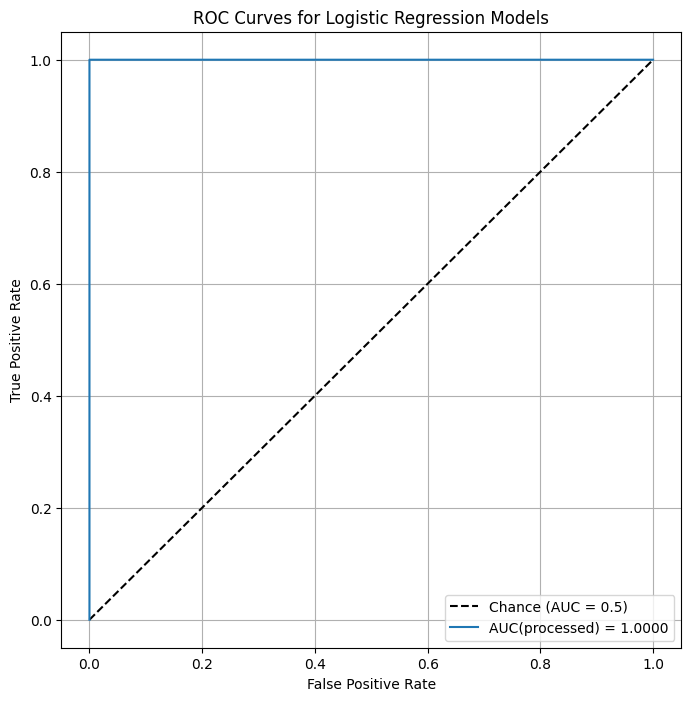

In [129]:
# ROC Curve
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.5)')

plt.plot(fpr, tpr, label=f'AUC(processed) = {auc:.4f}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

추가 분석에 대한 고민
- StockCode 또한 유의미한 변수로 판단하였기 때문에 전처리에 많은 시간을 투자하였지만 결국 마감 시간에 쫓겨 결국 제대로 활용하지 못한 아쉬움이 큼
- 또한 Quantity_group과 is_Invoice_contains_C 특징 정보는 반품 여부 예측에 정답지와 같을 정도로 너무 결정적인 특징이었음.
- 추후 분석에서는 제외 후 분석을 수행했어야 하는것이 아닌지에 대한 의문이 있음